<a href="https://colab.research.google.com/github/m3sibti/DL_projects/blob/master/NP_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Network (GAN) 
Implementation using only numpy

Following three process have been performed


1.   Feed Forward
2.   Loss Calculation
3.   Back Propagation 



Data is loaded from internet as an image then converted to the easily managable size (same like mnist dataset)

# Useful Imports

In [0]:
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt


# Activation Functions

In [0]:
# define functions 
def sigmoid(input, derivative=False):
    res = 1 / (1 + np.exp(-input))
    if derivative:
        return res * (1 - res)
    return res


def relu(input, derivative=False):
    res = input
    if derivative:
        return 1.0 * (res > 0)
    else:
        return res * (res > 0)
    # return np.maximum(input, 0, input) # ver. 2


def lrelu(input, alpha=0.01, derivative=False):
    res = input
    if derivative:
        dx = np.ones_like(res)
        dx[res < 0] = alpha
        return dx
    else:
        return np.maximum(input, input * alpha, input)


def tanh(input, derivative=False):
    res = np.tanh(input)
    if derivative:
        return 1.0 - np.tanh(input) ** 2
    return res


# Load Data

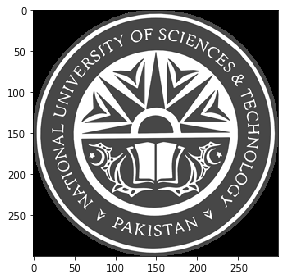

In [0]:
# LOAD REAL IMAGE

url = "https://i.ibb.co/bRqrfWz/nust-logo.png"
img1 = imread(url, as_gray=True)
img2 = resize(img1, (28, 28))
img3 = img_as_ubyte(img2)
imshow(img1)
# imshow(img3)
image = img3
# img3.shape

# Forward Pass

In [0]:
# generate Z from a uniform distribution
z = np.random.uniform(-1.0, 1.0, (100))

In [0]:
# initalize weights
g_W0 = np.random.randn(100, 128).astype(np.float32) * np.sqrt(2.0 / (100 + 128))
g_b0 = np.zeros(128).astype(np.float32)
g_W1 = np.random.randn(128, 784).astype(np.float32) * np.sqrt(2.0 / (128 + 784))
g_b1 = np.zeros(784).astype(np.float32)

d_W0 = np.random.randn(784, 128).astype(np.float32) * np.sqrt(2.0 / (784 + 128))
d_b0 = np.zeros(128).astype(np.float32)
d_W1 = np.random.randn(128, 1).astype(np.float32) * np.sqrt(2.0 / (128 + 1))
d_b1 = np.zeros(1).astype(np.float32)

In [0]:
# GENERATE FAKE IMAGE
# pass z through generator network
# generator work

g_h0_l = z.dot(g_W0) + g_b0
g_h0_a = lrelu(g_h0_l)

g_h1_l = g_h0_a.dot(g_W1) + g_b1
g_h1_a = tanh(g_h1_l)

g_out = np.reshape(g_h1_a, (28, 28))

fake_img = g_out
# return self.g_h1_l, self.g_out

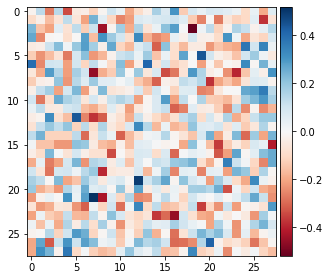

In [0]:
# Show fake image
imshow(fake_img)

In [0]:
# PASS both real and fake images through discriminator
# discriminator work

d_real_input = np.reshape(image, (-1))
d_real_h0_l = d_real_input.dot(d_W0) + d_b0
d_real_h0_a = lrelu(d_real_h0_l)

d_real_h1_l = d_real_h0_a.dot(d_W1) + d_b1
d_real_h1_a = sigmoid(d_real_h1_l)
d_real_out = d_real_h1_a

# return self.d_h1_l, self.d_out


d_fake_input = np.reshape(fake_img, (-1))
d_fake_h0_l = d_fake_input.dot(d_W0) + d_b0
d_fake_h0_a = lrelu(d_fake_h0_l)

d_fake_h1_l = d_fake_h0_a.dot(d_W1) + d_b1
d_fake_h1_a = sigmoid(d_fake_h1_l)
d_fake_out = d_fake_h1_a

# return self.d_h1_l, self.d_out

In [0]:
# check both results
d_real_out, d_fake_out

# real must be = 1 and fake = 0 but if it's not the case, 
# we have to optimize the weights 
# and here comes the backprop (backward pass) 

(array([1.]), array([0.52497632]))

In [0]:
epsilon = 10e-8

In [0]:
# cross entropy loss using sigmoid output
# First calculte the losses
# Discriminator loss = -np.mean(log(D(x)) + log(1-D(G(z))))

d_loss = -np.log(d_real_out + epsilon) - np.log(1 - d_fake_out + epsilon)
d_loss

array([0.74439032])

In [0]:
# Generator loss
# ver1 : minimize log(1 - D(G(z)))
# ver2 : maximize -log(D(G(z))) #this is better
g_loss = -np.log(d_fake_out + epsilon)
g_loss

array([0.64440193])

# Backward Pass (BACKPROP)

In [0]:
learning_rate = 0.001

**Discriminator's Backprop**

In [0]:
# set some values for clear instructions
d_real_logits = d_real_h1_l
d_real_output = d_real_out
d_real_img = image
d_fake_logits = d_fake_h1_l
d_fake_output = d_fake_out
d_fake_img = fake_img
# d_real_img.shape # check shape


In [0]:
# flatten the images
d_real_input = np.reshape(d_real_img, (-1))
d_fake_input = np.reshape(d_fake_img, (-1))
# d_real_img.shape

In [0]:
# Discriminator loss = -np.mean(log(D(x)) + log(1-D(G(z))))
# Calculate gradients of the loss
d_real_loss = -1.0 / (d_real_output + epsilon)
d_fake_loss = -1.0 / (d_fake_output - 1.0 + epsilon)

In [0]:
# start from the error in the last layer
#######################################
#		real input gradients
#		-log(D(x))
#######################################
d_loss_deriv = d_real_loss * sigmoid(d_real_logits, derivative=True)
d_prev_layer = np.expand_dims(d_real_h0_a, axis=-1)
d_loss_deriv_ = np.expand_dims(d_loss_deriv, axis=0)
d_grad_real_W1 = np.matmul(d_prev_layer, d_loss_deriv_)
d_grad_real_b1 = d_loss_deriv

d_loss_deriv = d_loss_deriv.dot(d_W1.T)
d_loss_deriv = d_loss_deriv * lrelu(d_real_h0_l, derivative=True)
d_prev_layer = np.expand_dims(d_real_input, axis=-1)
d_loss_deriv_ = np.expand_dims(d_loss_deriv, axis=0)
d_grad_real_W0 = np.matmul(d_prev_layer, d_loss_deriv_)
d_grad_real_b0 = d_loss_deriv

In [0]:
#######################################
#		fake input gradients
#		-log(1 - D(G(z)))
#######################################
d_loss_deriv = d_fake_loss * sigmoid(d_fake_logits, derivative=True)
d_prev_layer = np.expand_dims(d_fake_h0_a, axis=-1)
d_loss_deriv_ = np.expand_dims(d_loss_deriv, axis=0)
d_grad_fake_W1 = np.matmul(d_prev_layer, d_loss_deriv_)
d_grad_fake_b1 = d_loss_deriv

d_loss_deriv = d_loss_deriv.dot(d_W1.T)
d_loss_deriv = d_loss_deriv * lrelu(d_fake_h0_l, derivative=True)
d_prev_layer = np.expand_dims(d_fake_input, axis=-1)
d_loss_deriv_ = np.expand_dims(d_loss_deriv, axis=0)
d_grad_fake_W0 = np.matmul(d_prev_layer, d_loss_deriv_)
d_grad_fake_b0 = d_loss_deriv

In [0]:
# combine two gradients (real + fake)
d_grad_W1 = d_grad_real_W1 + d_grad_fake_W1
d_grad_b1 = d_grad_real_b1 + d_grad_fake_b1

d_grad_W0 = d_grad_real_W0 + d_grad_fake_W0
d_grad_b0 = d_grad_real_b0 + d_grad_fake_b0


In [0]:
# Now Make updates the weights
d_W0 = d_W0 - learning_rate * d_grad_W0
d_b0 = d_b0 - learning_rate * d_grad_b0

d_W1 = d_W1 - learning_rate * d_grad_W1
d_b1 = d_b1 - learning_rate * d_grad_b1

**Generator BackProp**

In [0]:
# get fake_output and fake_logists from discriminator to update weight of generator
g_loss = -1.0 / (d_fake_out + epsilon)
# g_loss

In [0]:
# calculate the gradients from the end of the discriminator
# we calculate them but won't update the discriminator weights
g_loss_deriv = g_loss * sigmoid(d_fake_h1_l, derivative=True)
g_loss_deriv = g_loss_deriv.dot(d_W1.T)

g_loss_deriv = g_loss_deriv * lrelu(d_fake_h0_l, derivative=True)
g_loss_deriv = g_loss_deriv.dot(d_W0.T)
# g_loss_deriv.shape # reach to D's first layer mean image

In [0]:
'''
# prac check xxxxxxxxxxxxxxx
g_loss_deriv = g_loss_deriv * tanh(g_h1_l, derivative=True)
pl = np.expand_dims(g_h0_a, axis=-1)
ll = np.expand_dims(g_loss_deriv, axis = 0)
asx = np.matmul(pl, ll)
pl.shape, ll.shape
'''

'\n# prac check xxxxxxxxxxxxxxx\ng_loss_deriv = g_loss_deriv * tanh(g_h1_l, derivative=True)\npl = np.expand_dims(g_h0_a, axis=-1)\nll = np.expand_dims(g_loss_deriv, axis = 0)\nasx = np.matmul(pl, ll)\npl.shape, ll.shape\n'

In [0]:
# Reached the end of the generator

# Calculate generator gradients
#######################################
#		fake input gradients
#		-log(D(G(z)))
#######################################
g_loss_deriv = g_loss_deriv * tanh(g_h1_l, derivative=True)
g_prev_layer = np.expand_dims(g_h0_a, axis=-1)
g_loss_deriv_ = np.expand_dims(g_loss_deriv, axis=0)
g_grad_W1 = np.matmul(g_prev_layer, g_loss_deriv_)
g_grad_b1 = g_loss_deriv

g_loss_deriv = g_loss_deriv.dot(g_W1.T)
g_loss_deriv = g_loss_deriv * lrelu(g_h0_l, derivative=True)
g_prev_layer = np.expand_dims(z, axis=-1)
g_loss_deriv_ = np.expand_dims(g_loss_deriv, axis=0)
g_grad_W0 = np.matmul(g_prev_layer, g_loss_deriv_)
g_grad_b0 = g_loss_deriv
# g_grad_W0.shape, g_grad_W1.shape

In [0]:
# UPDATE THE GENERATOR WEIGHTS
g_W0 = g_W0 - learning_rate * g_grad_W0
g_b0 = g_b0 - learning_rate * g_grad_b0

g_W1 = g_W1 - learning_rate * g_grad_W1
g_b1 = g_b1 - learning_rate * g_grad_b1

**GO AND RUN THE GENERATOR CODE TO GENERATE NEW IMAGE AND CHECK**

**If it's working the updated weights are working correctly**

# Re-Generate the **FAKE** Image

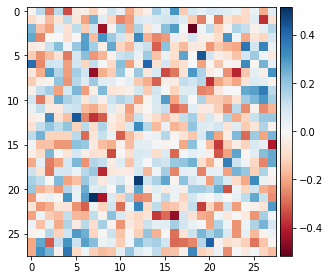

In [0]:
# GENERATE FAKE IMAGE

g_h0_l = z.dot(g_W0) + g_b0
g_h0_a = lrelu(g_h0_l)

g_h1_l = g_h0_a.dot(g_W1) + g_b1
g_h1_a = tanh(g_h1_l)

g_out = np.reshape(g_h1_a, (28, 28))

fake_img = g_out

imshow(fake_img)